### ASTR 3300/ PHYS 5300-003: Astrostatistics
***N. Pol***
___

# Homework 7
### Due: Friday, Apr. 4, at 11.59pm CT
---

This is a regression problem. Many of the parts require minor variations of code to switch to new techniques, but otherwise using a similar workflow. 

Note of warning: the data I have provided have associated uncertainties, `yerr`. `sklearn` and `astroML` have different formats for using uncertainties; in `sklearn` fitting you can provide `sample_weight=1/yerr**2`, while in `astroML` fitting you can directly provide `y_error=yerr`.

1. Read in `hw7_data_1.npy`. The dataset should consist of $500$ samples. The first two columns are the two data features, `X`. The third column is the target labels, `y`, and the final column are the heteroscedastic uncertainties on the labels, `yerr`. Make a 2-panel scatter plot of the labels versus each feature.


2. Use multivariate linear regression on this data with its uncertainties (`astroML` rather than plain `sklearn` is the better option here). Print the best-fit intercept and slopes for the features. Make a prediction `Xgrid` over $50$ values from the min to the max value of each feature, and plot the best-fit model on a duplicate of the $2$-panel plot from (1); does this look like a good description of the data?


3. Make a new two-dimensional prediction meshgrid `Xgrid` over the $2$-D feature space, use your best-fit model to predict the labels, and make a $3$-D interactive plot showing the data and your best-fit over the entire space. You may find the following code useful.

In [ ]:
# install the relevant interactive plot packages
# only do this once
!pip install ipywidgets ipympl

In [15]:
# Makes the plot interactive. 
# You can pan the image.

### always do this line at the start 
### of an interactive plotting cell
%matplotlib widget 
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')

ax.plot(___, ___, y, color='k', 
        zorder=15, linestyle='none', 
        marker='o', alpha=0.5)
ax.scatter(___.flatten(), ___.flatten(), ___, 
           facecolor=(0,0,0,0), s=20, 
           edgecolor='#70b3f0')
ax.set_xlabel('X[0]', fontsize=12)
ax.set_ylabel('X[1]', fontsize=12)
ax.set_zlabel('Target', fontsize=12)

ax.view_init(elev=28, azim=120)

NameError: name 'Y_grid' is not defined

In [11]:
!pip install plotly


  Using cached plotly-6.0.1-py3-none-any.whl.metadata (6.7 kB)
Using cached plotly-6.0.1-py3-none-any.whl (14.8 MB)


In [22]:
### Always do this line at the start
### of a static plotting cell
%matplotlib inline

4. Sticking with a linear model, now attempt a `GridSearchCV` procedure on the data to find the best `Ridge` regression hyper-parameters. Use the following `param_grid`:
```
ridge_params = {'alpha': [0.05,0.1,0.2,0.5,1.0], 'solver': ['svd', 'lsqr']}
```
What are the `best_params_` and the `best_score_` from this? Fit the data with the best options, and visualize interactively. Try `RidgeCV` also; what cross-validated `alpha_` does it return, and does this agree with `GridSeachCV`? *(Hint: remember to revert to inline matplotlib when you're done each time you make an interactive plot.)*


5. Now model the data using Gaussian process regression and the default kernel. Check what the fit looks like with and with and without uncertainties accounted for. *(Hint: GPR in `sklearn` takes an `alpha` parameter equal to `(yerr/y)**2`.)*


6. Let's look finally at polynomial fitting. Fit a $4$th degree polynomial to the data. Print the best-fit regression coefficients, predict on the 2D meshgrid, and visualize interactively as before. How does this look compared to the linear model and GPR models?


7. Sticking with polynomial fitting, let's find the optimal hyper-parameters through cross-validation. 
- Using `sklearn.model_selection.train_test_split`, first do a train-test split with a `test_size` of $20\%$. Then split out $20\%$ of the training set itself as a cross-validation set (leaving a somewhat smaller set to use for training). Note that you'll need to simultaneously split out `yerr` as well by just providing this as another array to `train_test_split`.
- Compute the training and cross-validation rms errors (and from those, the BIC values) as a function of polynomial degree from $1$ to $10$ inclusive. Plot the rms errors and BIC values as a function of the polynomial degree. 
- Choose the optimal polynomial degree, and train on all training data from the first `train_test_split` operation. Predict the labels of the held-out test set, and finally compute the testing rms error.

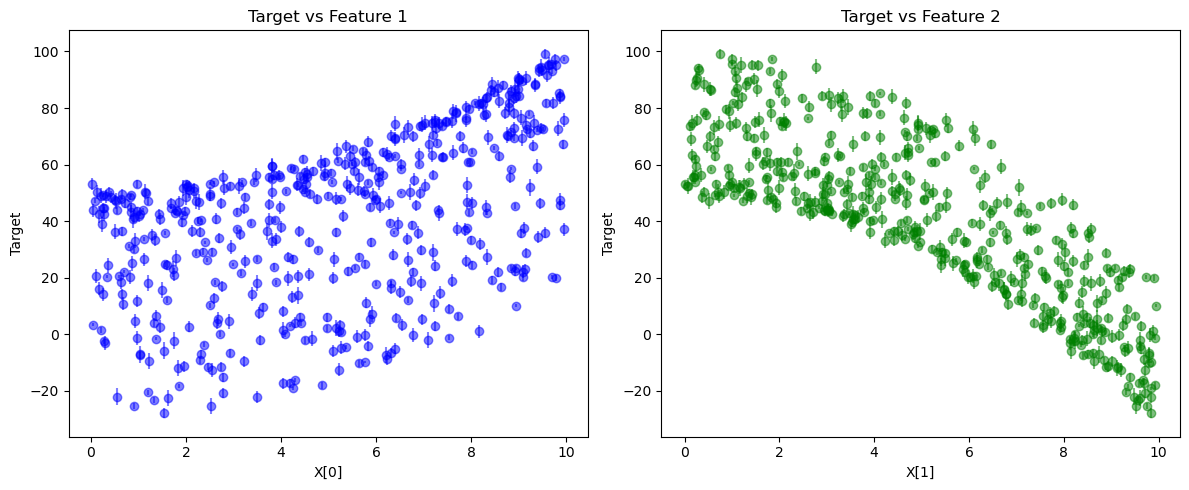

In [24]:
import numpy as np
import matplotlib.pyplot as plt

#Part1
# Load the data

data = np.load("/Users/kendrajeanjacques/repos/ASTR_3300_S2025/coursework/homeworks/hw_data/hw7_data_1.npy")

X = data[:, :2]  # First two columns as features
y = data[:, 2]   # Third column as target
yerr = data[:, 3]  # Final column as uncertainties

# Create a 2-panel scatter plot
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot y vs first feature
axes[0].errorbar(X[:, 0], y, yerr=yerr, fmt='o', color='b', alpha=0.5, label='Data')
axes[0].set_xlabel('X[0]')
axes[0].set_ylabel('Target')
axes[0].set_title('Target vs Feature 1')

# Plot y vs second feature
axes[1].errorbar(X[:, 1], y, yerr=yerr, fmt='o', color='g', alpha=0.5, label='Data')
axes[1].set_xlabel('X[1]')
axes[1].set_ylabel('Target')
axes[1].set_title('Target vs Feature 2')

plt.tight_layout()
plt.show()


Intercept: 57.10102323299536
Coefficients: [ 4.94873016 -8.30023407]


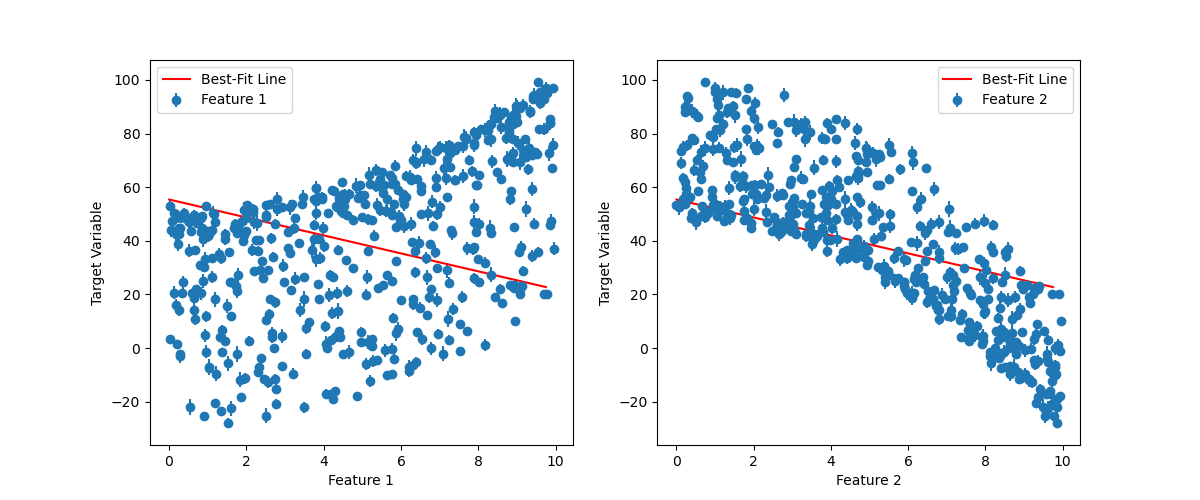

In [41]:
from astroML.linear_model import LinearRegression

# Fit multivariate linear regression model

model = LinearRegression(fit_intercept=True)
model.fit(X, y, y_error=yerr)

# Extract coefficients
# First element is the intercept
# Remaining elements are feature coefficients

inter = model.coef_[0]  
coeff = model.coef_[1:]  

print(f"Intercept: {inter}")
print(f"Coefficients: {coeff}")

# Generate prediction grid
Xgrid = np.linspace(X.min(), X.max(), 50).reshape(-1, 2)  # Ensure correct shape
predictions = model.predict(Xgrid)

# Plot predictions
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for i, ax in enumerate(axes):
    ax.errorbar(X[:, i], y, yerr=yerr, fmt='o', label=f'Feature {i+1}')
    ax.plot(Xgrid[:, 0], predictions, 'r-', label='Best-Fit Line')
    ax.set_xlabel(f'Feature {i+1}')
    ax.set_ylabel('Target Variable')
    ax.legend()

plt.show()


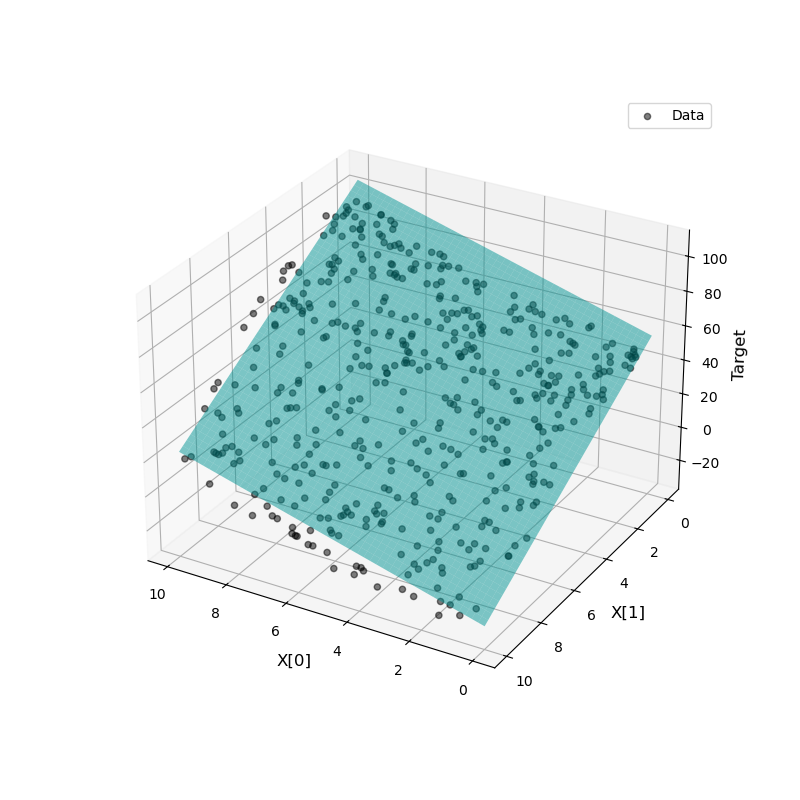

In [34]:
#Part3

from mpl_toolkits.mplot3d import Axes3D

# Makes the plot interactive. 
# You can pan the image.

### always do this line at the start 
### of an interactive plotting cell
%matplotlib widget 


# Create a 2D meshgrid for predictions
X_mesh, Y_mesh = np.meshgrid(X_grid, Y_grid)
Z_pred = model.predict(np.c_[X_mesh.ravel(), Y_mesh.ravel()]).reshape(X_mesh.shape)

# Create interactive 3D plot
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of original data
ax.scatter(X[:, 0], X[:, 1], y, color='k', marker='o', alpha=0.5, label="Data")

# Plot predicted surface
ax.plot_surface(X_mesh, Y_mesh, Z_pred, color='cyan', alpha=0.5)

# Labels and view adjustment
ax.set_xlabel('X[0]', fontsize=12)
ax.set_ylabel('X[1]', fontsize=12)
ax.set_zlabel('Target', fontsize=12)
ax.view_init(elev=28, azim=120)

plt.legend()
plt.show()



In [29]:
## Always do this line at the start
### of a static plotting cell
%matplotlib inline

Best Parameters: {'alpha': 1.0, 'solver': 'svd'}
Best Score: 0.9290800590702192
Cross-validated alpha: 1.0


/opt/anaconda3/envs/astr3300/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:2341: FutureWarning:

'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.



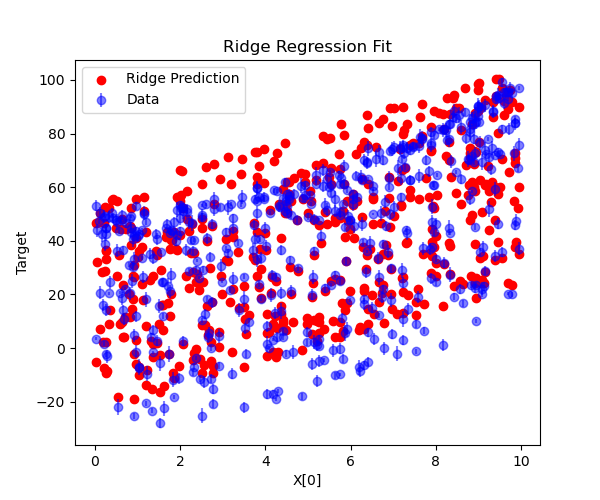

In [45]:
#Part4
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.model_selection import GridSearchCV

### always do this line at the start 
### of an interactive plotting cell
%matplotlib widget 

# Define Ridge regression parameters for GridSearchCV
ridge_params = {'alpha': [0.05, 0.1, 0.2, 0.5, 1.0], 'solver': ['svd', 'lsqr']}

# Perform GridSearchCV
ridge = Ridge()
grid_search = GridSearchCV(ridge, ridge_params, cv=5)
grid_search.fit(X, y)

# Get best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Fit RidgeCV to determine optimal alpha
ridge_cv = RidgeCV(alphas=[0.05, 0.1, 0.2, 0.5, 1.0], store_cv_values=True)
ridge_cv.fit(X, y)
print("Cross-validated alpha:", ridge_cv.alpha_)

# Visualize the best model
y_pred = ridge_cv.predict(X)
plt.figure(figsize=(6, 5))
plt.errorbar(X[:, 0], y, yerr=yerr, fmt='o', color='b', alpha=0.5, label='Data')
plt.scatter(X[:, 0], y_pred, color='r', label='Ridge Prediction')
plt.xlabel('X[0]')
plt.ylabel('Target')
plt.legend()
plt.title('Ridge Regression Fit')
plt.show()


/opt/anaconda3/envs/astr3300/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning:

The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.



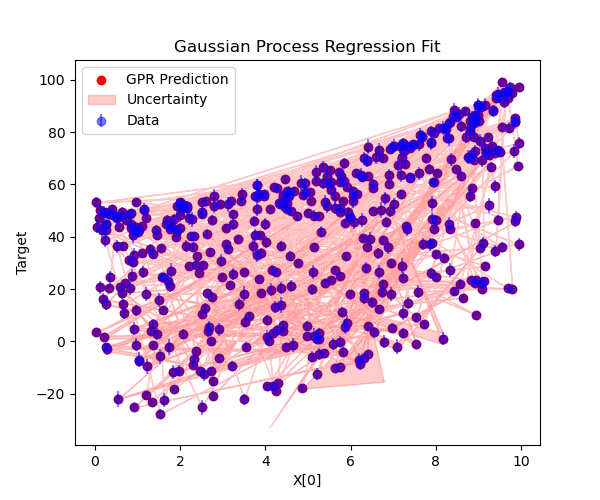

In [46]:
#Part5
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C


### always do this line at the start 
### of an interactive plotting cell
%matplotlib widget 

# Kernel Definition
kernel = C(1.0) * RBF(length_scale=1.0)

# Define and train Gaussian Process Regression
gpr = GaussianProcessRegressor(kernel=kernel, alpha=(yerr / y) ** 2)
gpr.fit(X, y)

# Predict on the same dataset
y_pred, y_std = gpr.predict(X, return_std=True)

# Visualize the results
plt.figure(figsize=(6, 5))
plt.errorbar(X[:, 0], y, yerr=yerr, fmt='o', color='b', alpha=0.5, label='Data')
plt.scatter(X[:, 0], y_pred, color='r', label='GPR Prediction')
plt.fill_between(X[:, 0], y_pred - y_std, y_pred + y_std, color='r', alpha=0.2, label='Uncertainty')
plt.xlabel('X[0]')
plt.ylabel('Target')
plt.legend()
plt.title('Gaussian Process Regression Fit')
plt.show()


Polynomial Coefficients: [ 2.57076894e+01  4.14421619e+00 -2.04999189e+00  3.91281981e-01
 -1.80881608e-02]


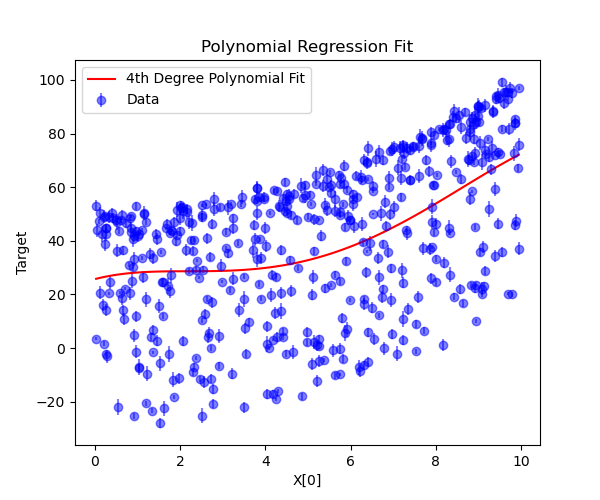

In [47]:
#Part6
import numpy.polynomial.polynomial as poly

### always do this line at the start 
### of an interactive plotting cell
%matplotlib widget 

# Fit a 4th-degree polynomial to the data
coeffs = poly.polyfit(X[:, 0], y, 4, w=1 / yerr)

# Generate predictions
x_vals = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
y_vals = poly.polyval(x_vals, coeffs)

# Print coefficients
print("Polynomial Coefficients:", coeffs)

# Visualize polynomial fit
plt.figure(figsize=(6, 5))
plt.errorbar(X[:, 0], y, yerr=yerr, fmt='o', color='b', alpha=0.5, label='Data')
plt.plot(x_vals, y_vals, color='r', label='4th Degree Polynomial Fit')
plt.xlabel('X[0]')
plt.ylabel('Target')
plt.legend()
plt.title('Polynomial Regression Fit')
plt.show()


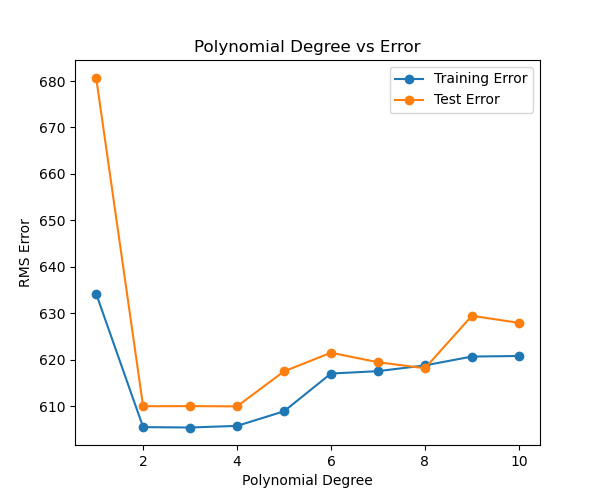

Optimal Polynomial Degree: 4
Final Test RMS Error: 24.696665991271058


In [44]:
#Part7
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Split data into training and testing sets
X_train, X_test, y_train, y_test, yerr_train, yerr_test = train_test_split(X[:, 0], y, yerr, test_size=0.2, random_state=42)

# Try polynomial degrees from 1 to 10
degrees = np.arange(1, 11)
train_errors = []
test_errors = []

for d in degrees:
    coeffs = poly.polyfit(X_train, y_train, d, w=1 / yerr_train)
    
    # Compute training error
    y_train_pred = poly.polyval(X_train, coeffs)
    train_errors.append(mean_squared_error(y_train, y_train_pred))

    # Compute test error
    y_test_pred = poly.polyval(X_test, coeffs)
    test_errors.append(mean_squared_error(y_test, y_test_pred))

# Plot errors vs polynomial degree
plt.figure(figsize=(6, 5))
plt.plot(degrees, train_errors, label='Training Error', marker='o')
plt.plot(degrees, test_errors, label='Test Error', marker='o')
plt.xlabel('Polynomial Degree')
plt.ylabel('RMS Error')
plt.legend()
plt.title('Polynomial Degree vs Error')
plt.show()

# Select the best polynomial degree
best_degree = degrees[np.argmin(test_errors)]
print("Optimal Polynomial Degree:", best_degree)

# Train final model on full training set
final_coeffs = poly.polyfit(X_train, y_train, best_degree, w=1 / yerr_train)

# Predict and evaluate on test set
y_test_pred_final = poly.polyval(X_test, final_coeffs)
final_test_error = mean_squared_error(y_test, y_test_pred_final)
print("Final Test RMS Error:", np.sqrt(final_test_error))
